# First Dataset: Gym Members Exercise Dataset

## Importing Dataset

This dataset provides a detailed overview of gym members' exercise routines, physical attributes, and fitness metrics. It contains 973 samples of gym data, including key performance indicators such as heart rate, calories burned, and workout duration. Each entry also includes demographic data and experience levels, allowing for comprehensive analysis of fitness patterns, athlete progression, and health trends.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("valakhorasani/gym-members-exercise-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/valakhorasani/gym-members-exercise-dataset/versions/1


In [2]:
import os
directory_path = '/root/.cache/kagglehub/datasets/valakhorasani/gym-members-exercise-dataset/versions/1'
files = os.listdir(directory_path)
print(files)

['gym_members_exercise_tracking.csv']


In [3]:
import pandas as pd

file_path = '/root/.cache/kagglehub/datasets/valakhorasani/gym-members-exercise-dataset/versions/1/gym_members_exercise_tracking.csv'
gym_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
gym_data.head()


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


## 1. Bar Chart for Workout Frequency

<ipython-input-4-f92178a0b4bc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Workout_Frequency (days/week)', data=gym_data, palette='viridis')


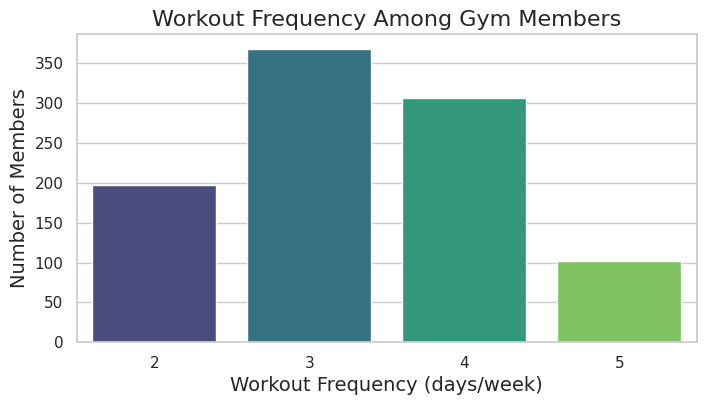

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot style
sns.set(style="whitegrid")

# Bar chart for Workout Frequency
plt.figure(figsize=(8, 4))
sns.countplot(x='Workout_Frequency (days/week)', data=gym_data, palette='viridis')

# Titles and labels
plt.title('Workout Frequency Among Gym Members', fontsize=16)
plt.xlabel('Workout Frequency (days/week)', fontsize=14)
plt.ylabel('Number of Members', fontsize=14)

# Plot Displaying
plt.show()


## 2. Scatter Plot - Session Duration vs. Calories Burned

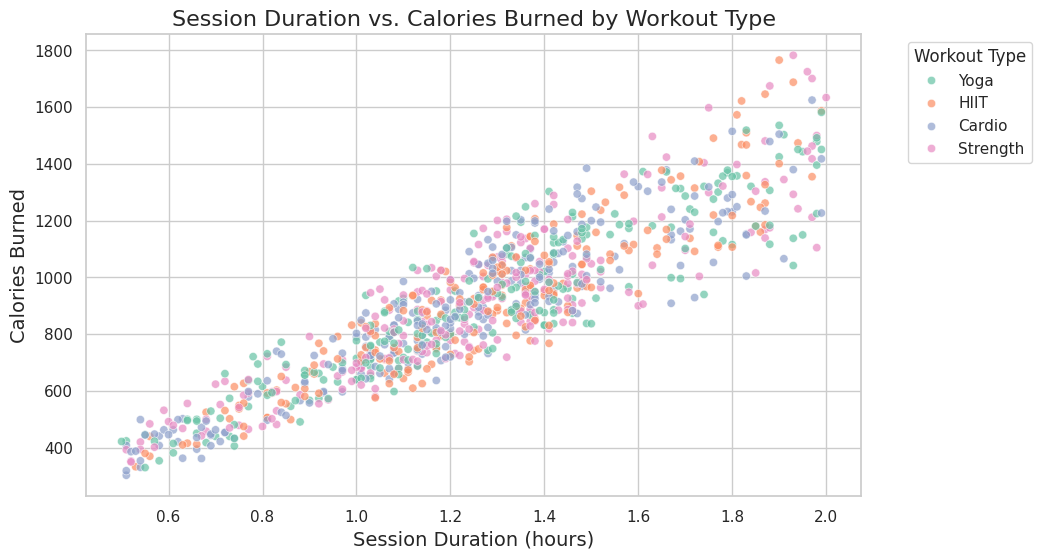

In [5]:
# Scatter plot for Session Duration vs. Calories Burned
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(
    x='Session_Duration (hours)',
    y='Calories_Burned',
    hue='Workout_Type',
    data=gym_data,
    palette='Set2',
    alpha=0.7
)

# Add titles and labels
plt.title('Session Duration vs. Calories Burned by Workout Type', fontsize=16)
plt.xlabel('Session Duration (hours)', fontsize=14)
plt.ylabel('Calories Burned', fontsize=14)
plt.legend(title='Workout Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()


## 3. Box Plot - Resting BPM by Experience Level

<ipython-input-20-9b62061cb463>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(


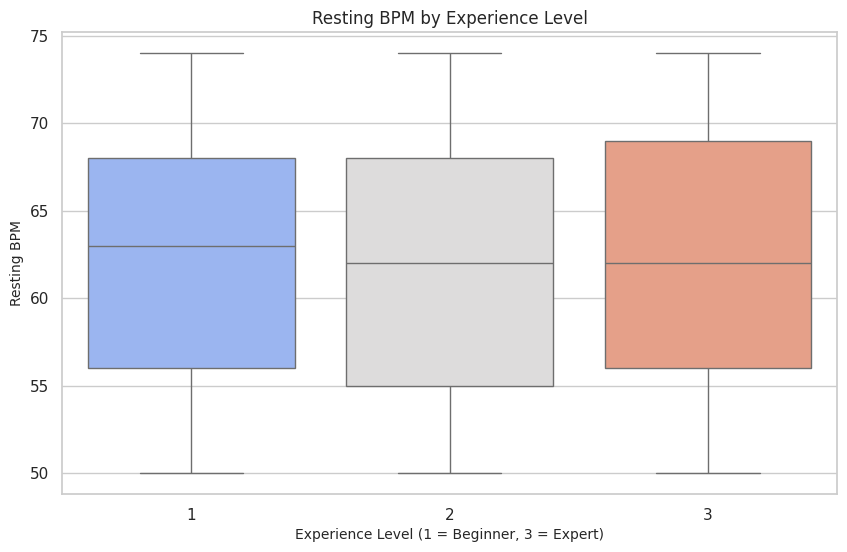

In [20]:
# Box plot for Resting BPM by Experience Level
plt.figure(figsize=(10, 6))
box_plot = sns.boxplot(
    x='Experience_Level',
    y='Resting_BPM',
    data=gym_data,
    palette='coolwarm',
)

# Add titles and labels
plt.title('Resting BPM by Experience Level', fontsize=12)
plt.xlabel('Experience Level (1 = Beginner, 3 = Expert)', fontsize=10)
plt.ylabel('Resting BPM', fontsize=10)

# Display the plot
plt.show()


## 4. Histogram - Age Distribution

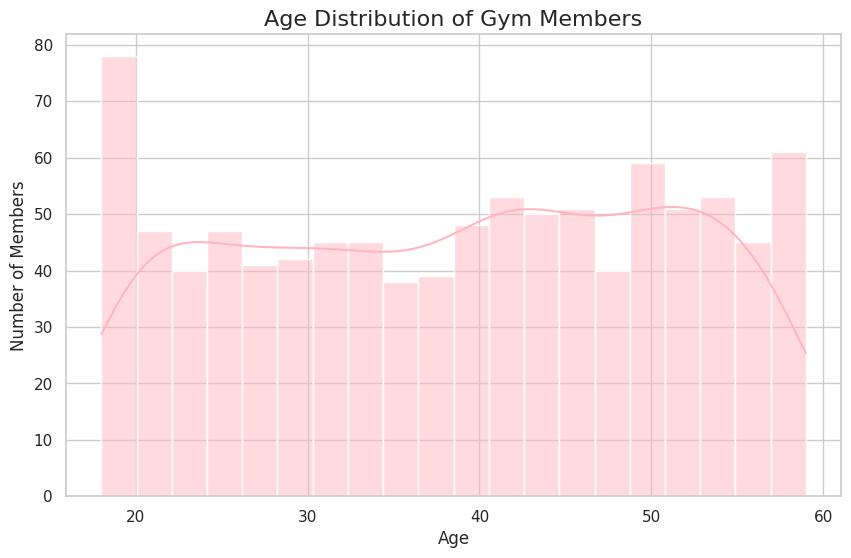

In [7]:
# Histogram for Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(
    gym_data['Age'],
    bins=20,
    kde=True,
    color='lightpink'
)

# Add titles and labels
plt.title('Age Distribution of Gym Members', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Members', fontsize=12)

# Display the plot
plt.show()

## 5. Heatmap - Correlation Matrix

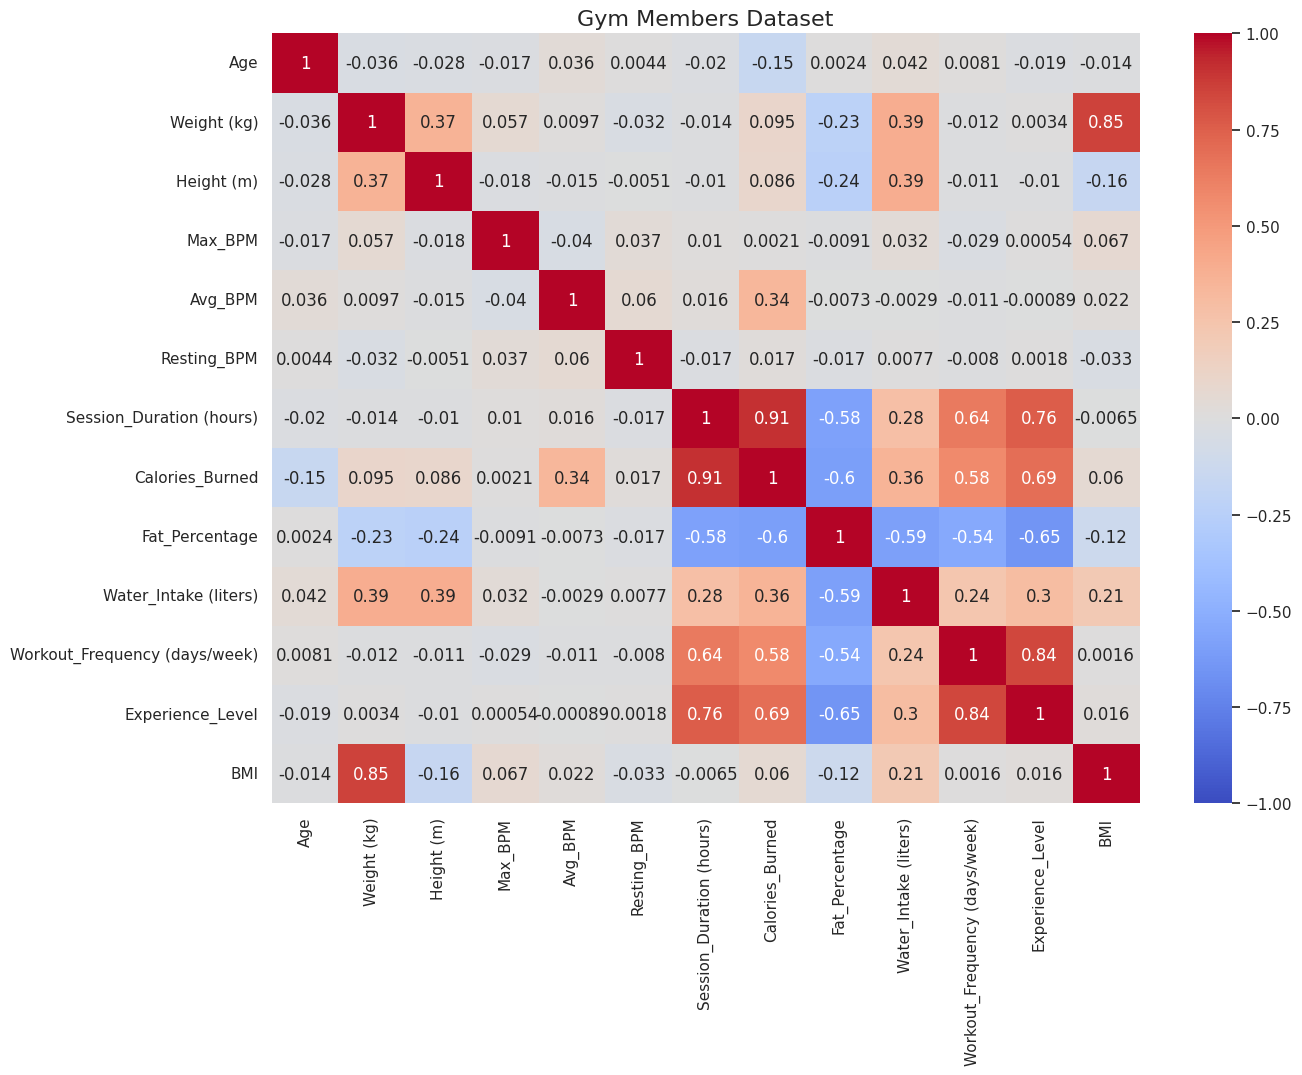

In [8]:
# Correlation heatmap for numerical variables
plt.figure(figsize=(14, 10))

# Select only numerical columns for correlation calculation
numerical_data = gym_data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()  # Calculate correlation on numerical data
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1
)

# Add titles
plt.title('Gym Members Dataset', fontsize=16)

# Display the heatmap
plt.show()

## 6.Pair Plot - Selected Variables

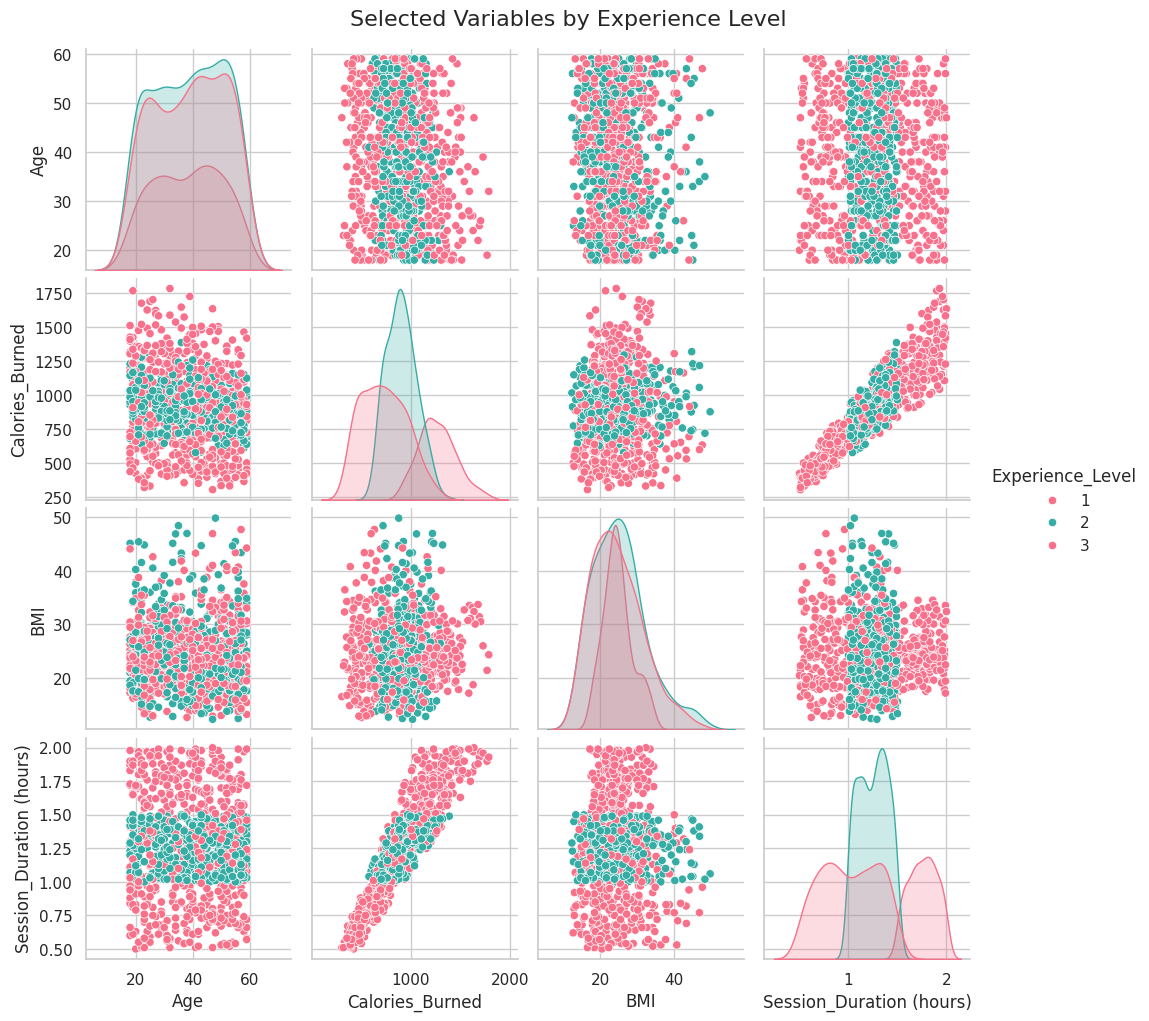

In [9]:
# Pair plot for selected numerical variables
selected_columns = ['Age', 'Calories_Burned', 'BMI', 'Session_Duration (hours)', 'Experience_Level']
pair_plot = sns.pairplot(
    gym_data[selected_columns],
    hue='Experience_Level',
    palette='husl',
    diag_kind='kde'
)

# Add a title
pair_plot.fig.suptitle('Selected Variables by Experience Level', y=1.02, fontsize=16)

# Display the pair plot
plt.show()


## 7. 3D Scatter Plot of Gym Data - Session Duration vs. Calories Burned vs. BMI

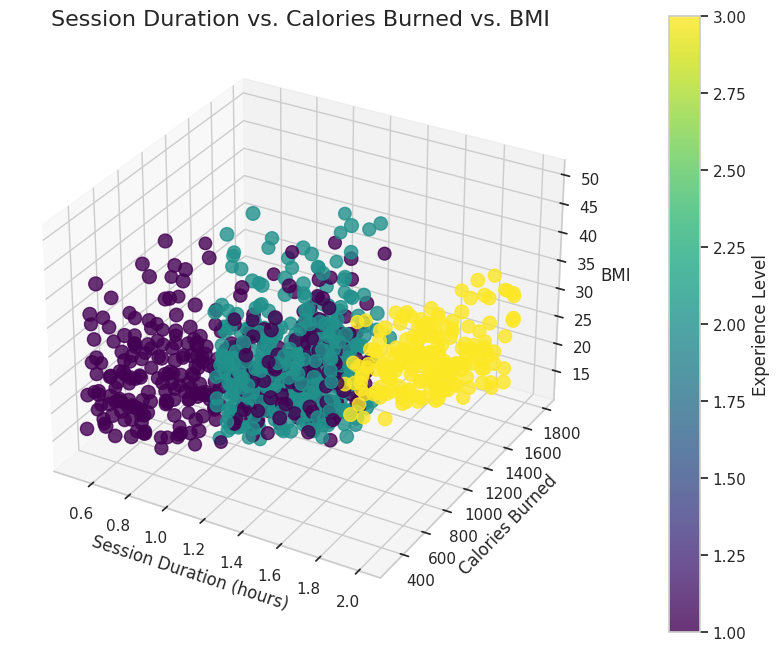

In [10]:
from mpl_toolkits.mplot3d import Axes3D

# Prepare the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the data
scatter = ax.scatter(
    gym_data['Session_Duration (hours)'],
    gym_data['Calories_Burned'],
    gym_data['BMI'],
    c=gym_data['Experience_Level'],
    s=gym_data['Max_BPM'] / 2,
    cmap='viridis',
    alpha=0.8
)

# Setting the axes labels
ax.set_xlabel('Session Duration (hours)', fontsize=12)
ax.set_ylabel('Calories Burned', fontsize=12)
ax.set_zlabel('BMI', fontsize=12)

# Adding color bar for Experience Level
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Experience Level')

# Add a title
plt.title('Session Duration vs. Calories Burned vs. BMI', fontsize=16)

# Display the plot
plt.show()

# Second Dataset: Mobile Device Usage and User Behaviour Dataset

This dataset provides a comprehensive analysis of mobile device usage patterns and user behavior classification. It contains 700 samples of user data, including metrics such as app usage time, screen-on time, battery drain, and data consumption. Each entry is categorized into one of five user behavior classes, ranging from light to extreme usage, allowing for insightful analysis and modeling.

In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("valakhorasani/mobile-device-usage-and-user-behavior-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset/versions/1


In [15]:
import os
directory_path2 = '/root/.cache/kagglehub/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset/versions/1'
files2 = os.listdir(directory_path2)
print(files2)

['user_behavior_dataset.csv']


In [23]:
# Load the new dataset
file_path2 = '/root/.cache/kagglehub/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset/versions/1/user_behavior_dataset.csv'
user_behavior_data = pd.read_csv(file_path2)

# Display the first few rows to understand its structure
user_behavior_data.head()


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


## 1. Distribution Of User Behavior Classes

<ipython-input-24-8ba6daa54c67>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='User Behavior Class', data=user_behavior_data, palette='plasma')


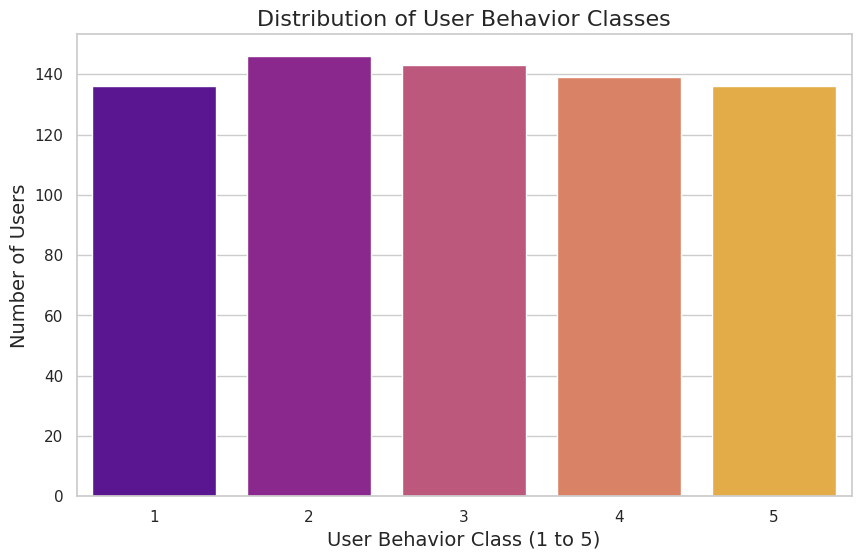

In [24]:
# Bar chart for the distribution of User Behavior Classes
plt.figure(figsize=(10, 6))
sns.countplot(x='User Behavior Class', data=user_behavior_data, palette='plasma')

# Add titles and labels
plt.title('Distribution of User Behavior Classes', fontsize=16)
plt.xlabel('User Behavior Class (1 to 5)', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)

# Display the plot
plt.show()

## 2. Box Plot for App Usage Time by User Behavior Class

<ipython-input-25-5b7f9c8ed638>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


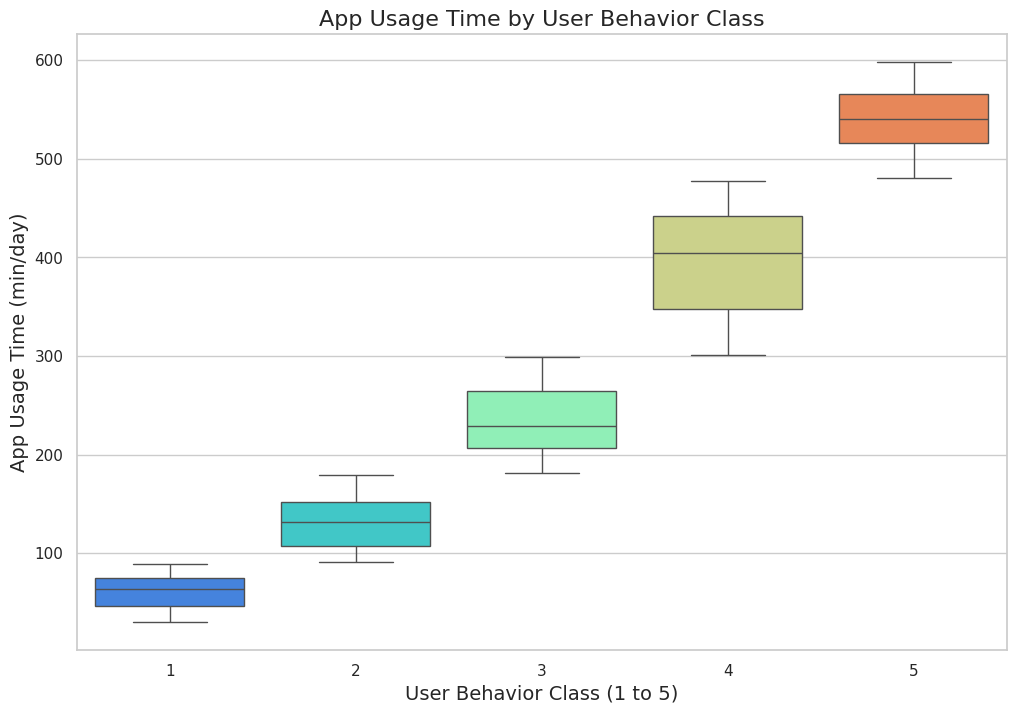

In [25]:
# Box plot for App Usage Time by User Behavior Class
plt.figure(figsize=(12, 8))
sns.boxplot(
    x='User Behavior Class',
    y='App Usage Time (min/day)',
    data=user_behavior_data,
    palette='rainbow'
)

# Add titles and labels
plt.title('App Usage Time by User Behavior Class', fontsize=16)
plt.xlabel('User Behavior Class (1 to 5)', fontsize=14)
plt.ylabel('App Usage Time (min/day)', fontsize=14)

# Display the plot
plt.show()

## 3. Scatter Plot for Screen On Time vs. Battery Drain

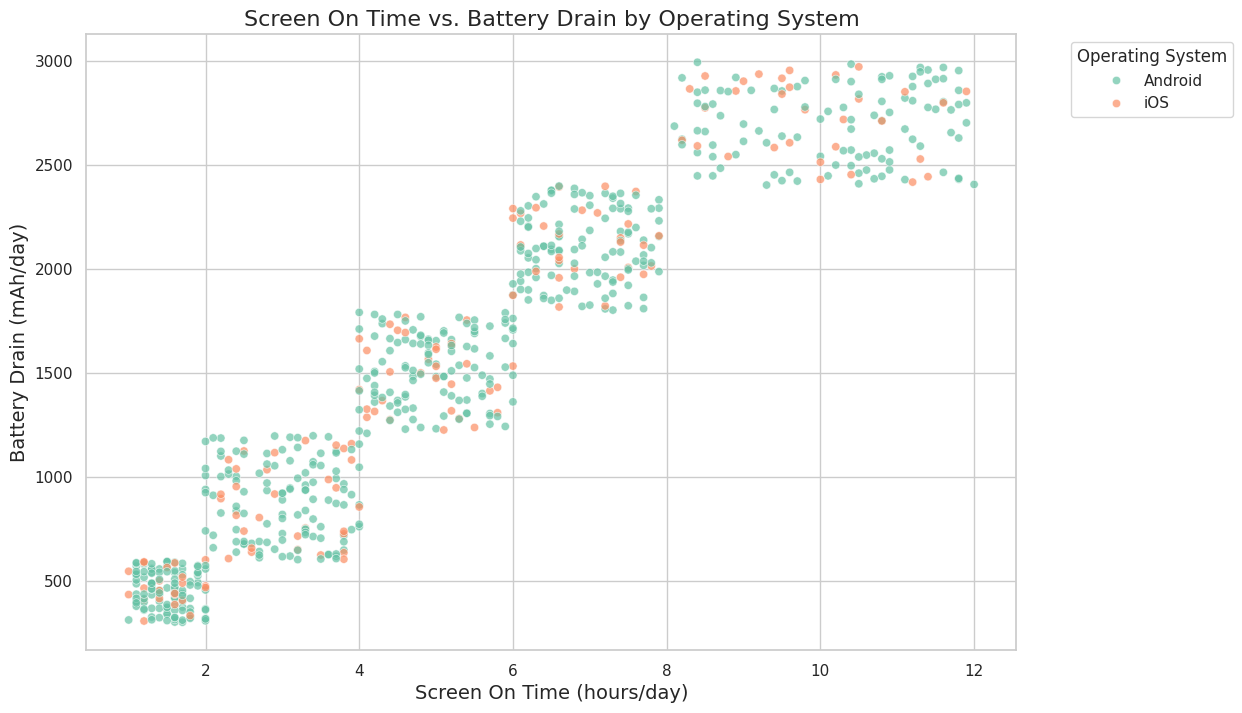

In [31]:
# Scatter plot for Screen On Time vs. Battery Drain
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(
    x='Screen On Time (hours/day)',
    y='Battery Drain (mAh/day)',
    hue='Operating System',
    data=user_behavior_data,
    palette='Set2',
    alpha=0.7
)

# Add titles and labels
plt.title('Screen On Time vs. Battery Drain by Operating System', fontsize=16)
plt.xlabel('Screen On Time (hours/day)', fontsize=14)
plt.ylabel('Battery Drain (mAh/day)', fontsize=14)
plt.legend(title='Operating System', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

## 4. Heatmap for Correlation Matrix

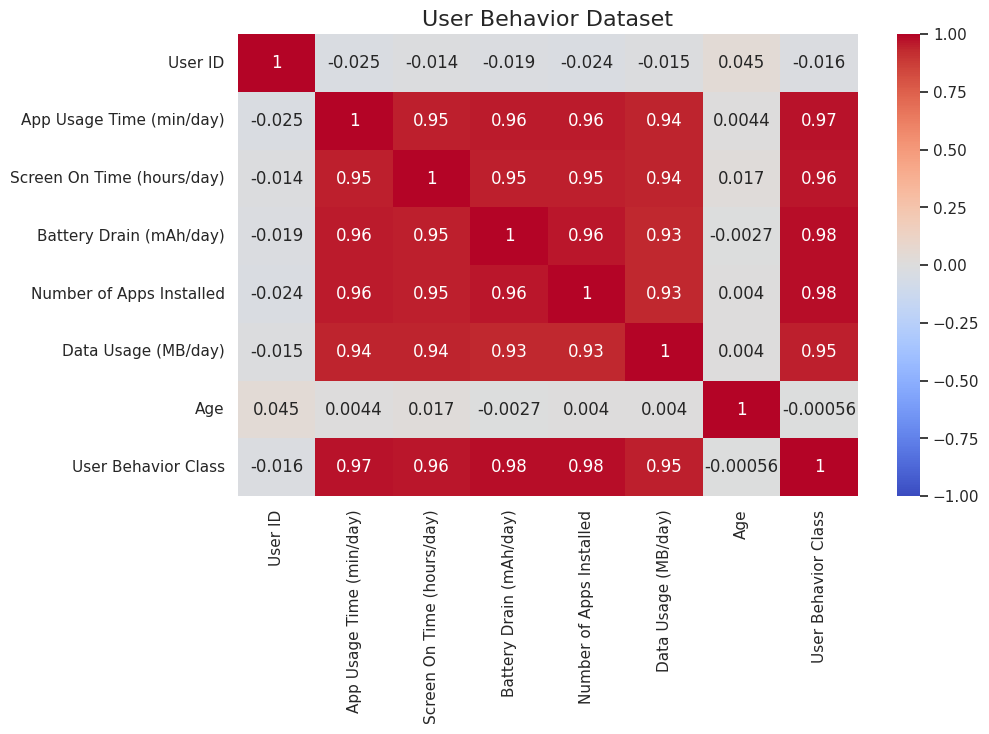

In [43]:
# Correlation heatmap for numerical variables in the user behavior dataset
plt.figure(figsize=(10, 6))

# Select only numerical features for correlation analysis
numerical_data = user_behavior_data.select_dtypes(include=['number'])

correlation_matrix = numerical_data.corr()
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1
)

# Add titles
plt.title('User Behavior Dataset', fontsize=16)

# Display the heatmap
plt.show()

## 5. 3D Scatter Plot for Multi-Dimensional Analysis

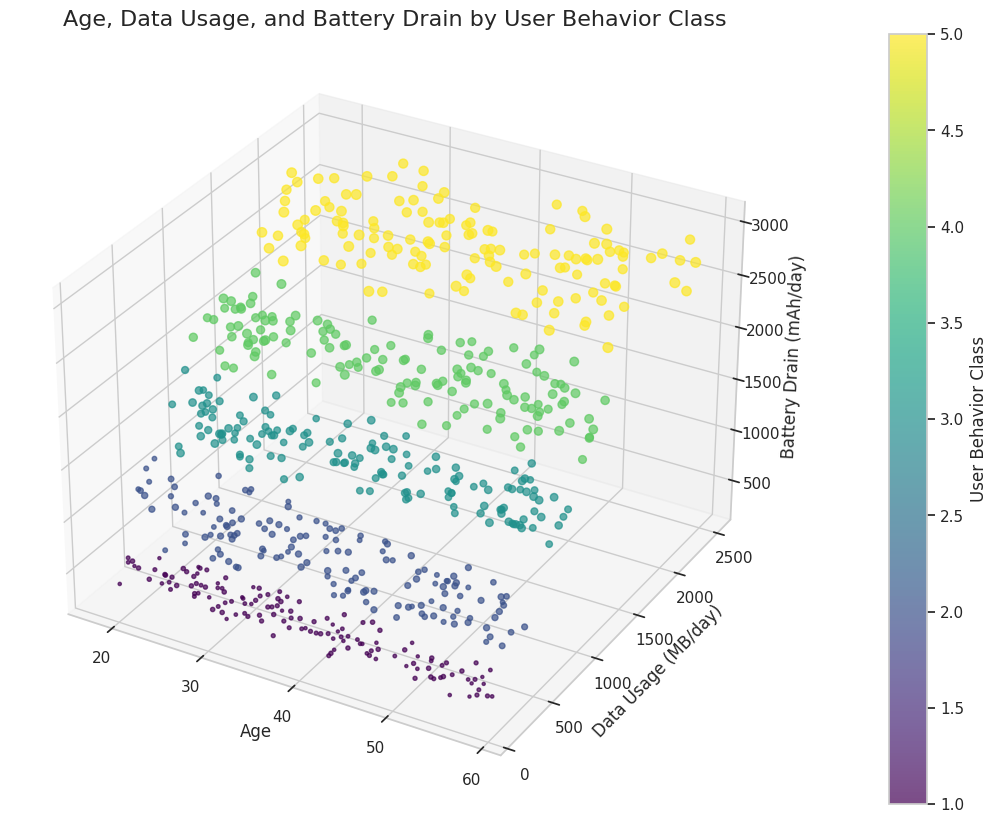

In [37]:
# 3D Scatter plot for Age, Data Usage, and Battery Drain with User Behavior Class
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Plotting the data
scatter = ax.scatter(
    user_behavior_data['Age'],
    user_behavior_data['Data Usage (MB/day)'],
    user_behavior_data['Battery Drain (mAh/day)'],
    c=user_behavior_data['User Behavior Class'],
    s=user_behavior_data['Number of Apps Installed'] / 2,
    cmap='viridis',
    alpha=0.7
)

# Setting the axes labels
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Data Usage (MB/day)', fontsize=12)
ax.set_zlabel('Battery Drain (mAh/day)', fontsize=12)

# Adding color bar for User Behavior Class
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('User Behavior Class')

# Add a title
plt.title('Age, Data Usage, and Battery Drain by User Behavior Class', fontsize=16)

# Display the plot
plt.show()


## 6. Facet Grid for App Usage Time by Gender and User Behavior Class

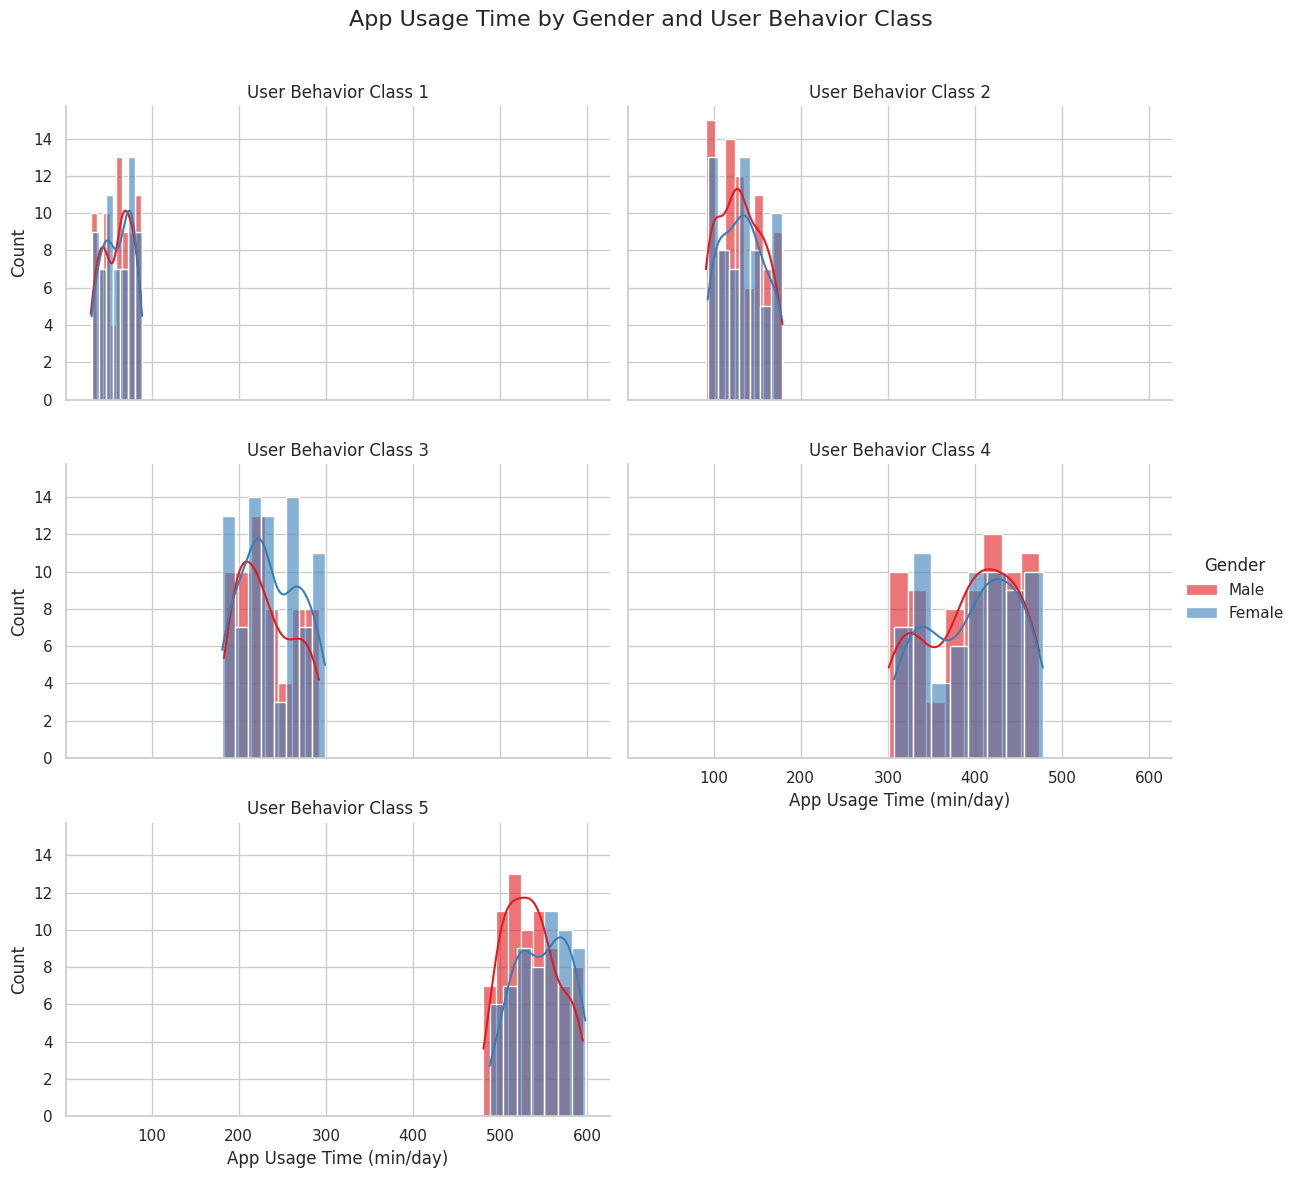

In [44]:
# Facet Grid for App Usage Time by Gender and User Behavior Class
g = sns.FacetGrid(user_behavior_data, col='User Behavior Class', hue='Gender', palette='Set1', col_wrap=2, height=4, aspect=1.5)
g.map(sns.histplot, 'App Usage Time (min/day)', kde=True, alpha=0.6)

# Add titles and adjust layout
g.add_legend(title='Gender')
g.set_axis_labels('App Usage Time (min/day)', 'Count')
g.set_titles('User Behavior Class {col_name}')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('App Usage Time by Gender and User Behavior Class', fontsize=16)

# Display the facet grid
plt.show()


## 7. Violin Plot for Data Usage by User Behavior Class

<ipython-input-41-adf9e53facd4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


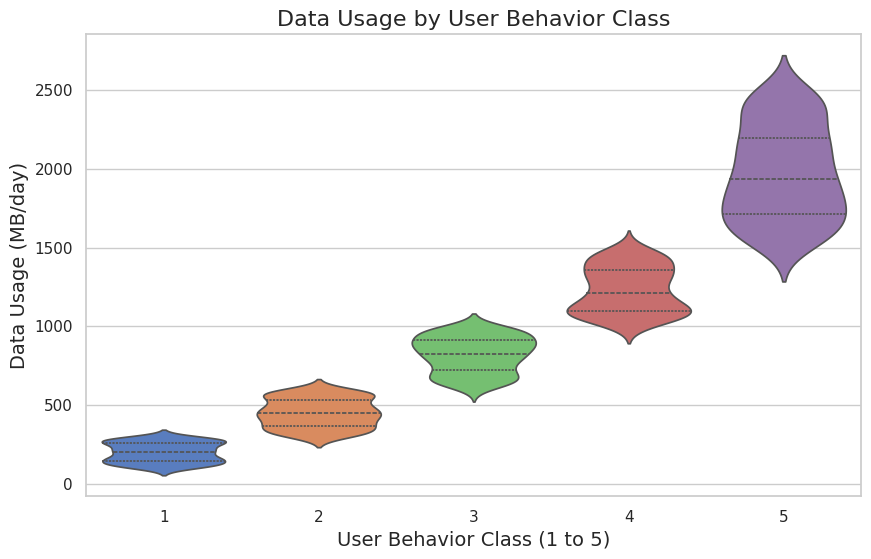

In [41]:
# Violin plot for Data Usage by User Behavior Class
plt.figure(figsize=(10, 6))
sns.violinplot(
    x='User Behavior Class',
    y='Data Usage (MB/day)',
    data=user_behavior_data,
    palette='muted',
    inner='quartile'
)

# Add titles and labels
plt.title('Data Usage by User Behavior Class', fontsize=16)
plt.xlabel('User Behavior Class (1 to 5)', fontsize=14)
plt.ylabel('Data Usage (MB/day)', fontsize=14)

# Display the plot
plt.show()
